In [2]:
# load cleaned dataset created in EDA notebook
import pandas as pd
df = pd.read_csv("cardio_clean.csv")
df.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_cat,cholesterol,gluc,smoke,alco,active,cardio,cardio_percent,age_years
0,50.36,0,1,168,62.0,21.97,110,80,normal,1,1,0,0,1,0,0,50
1,55.38,1,0,156,85.0,34.93,140,90,high 2,3,1,0,0,1,1,100,55
2,51.63,1,0,165,64.0,23.51,130,70,high 1,3,1,0,0,0,1,100,51
3,48.25,0,1,169,82.0,28.71,150,100,high 2,1,1,0,0,1,1,100,48
4,47.84,1,0,156,56.0,23.01,100,60,normal,1,1,0,0,0,0,0,47


In [3]:
# machine learning libraries and metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

In [4]:
# split features and target
X = df.drop(['cardio', 'bp_cat', 'cardio_percent'], axis=1)
y = df['cardio']

In [5]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [6]:
# scale data for models that are sensitive to feature size
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# logistic regression baseline model
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train_scaled, y_train)

print("Logistic Regression Test Accuracy:",
      round(logreg.score(X_test_scaled, y_test) * 100, 2))

print("Logistic Regression F1 Score:",
      round(f1_score(y_test, logreg.predict(X_test_scaled)), 4))

Logistic Regression Test Accuracy: 73.39
Logistic Regression F1 Score: 0.7159


In [8]:
# decision tree model
dt = DecisionTreeClassifier(max_depth=10, random_state=0)
dt.fit(X_train, y_train)

print("Decision Tree Test Accuracy:",
      round(accuracy_score(y_test, dt.predict(X_test)) * 100, 2))

Decision Tree Test Accuracy: 72.63


In [9]:
# random forest model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

print("Random Forest Test Accuracy:",
      round(accuracy_score(y_test, rf.predict(X_test)) * 100, 2))

Random Forest Test Accuracy: 71.53


In [10]:
# hyperparameter tuning for random forest
rf_params = {
    'n_estimators': [51, 55],
    'max_depth': [10],
    'max_features': ['sqrt']
}

rf_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=0),
    rf_params,
    cv=5,
    n_iter=10,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10],
                                        'max_features': ['sqrt'],
                                        'n_estimators': [51, 55]})

In [11]:
# final tuned random forest
rf_final = RandomForestClassifier(
    n_estimators=51,
    max_depth=10,
    random_state=0
)

rf_final.fit(X_train, y_train)

print("Final RF Accuracy:",
      round(accuracy_score(y_test, rf_final.predict(X_test)) * 100, 2))

Final RF Accuracy: 74.11


In [12]:
# xgboost model
xgb = XGBClassifier(
    n_estimators=150,
    max_depth=4,
    learning_rate=0.13,
    gamma=0.24,
    reg_lambda=50,
    eval_metric='logloss',
    random_state=0
)

xgb.fit(X_train, y_train)

print("XGBoost Test Accuracy:",
      round(accuracy_score(y_test, xgb.predict(X_test)) * 100, 2))

print("XGBoost F1 Score:",
      round(f1_score(y_test, xgb.predict(X_test)), 4))

XGBoost Test Accuracy: 74.21
XGBoost F1 Score: 0.7285


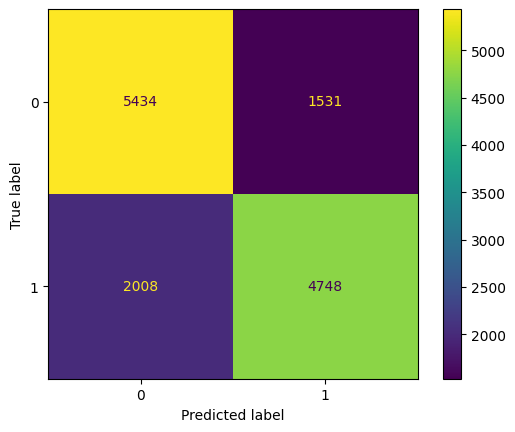

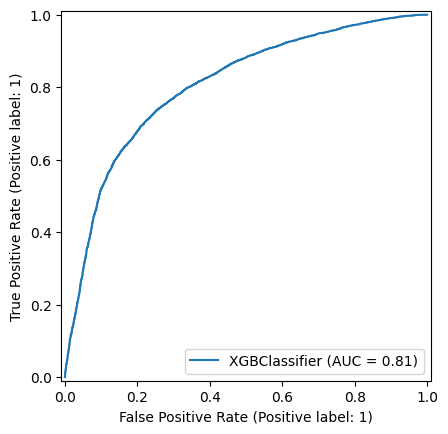

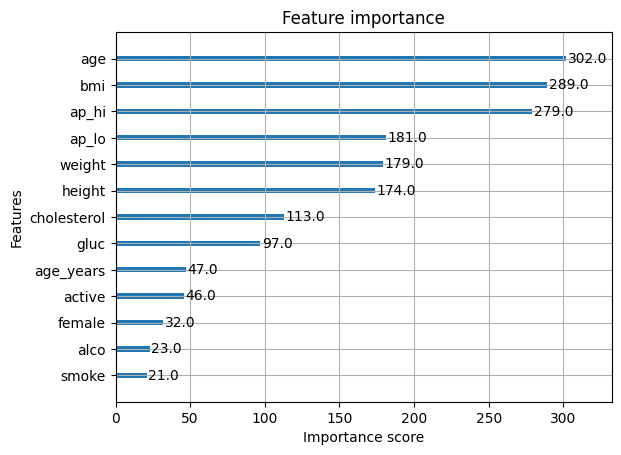

In [13]:
# confusion matrix and ROC curve for best model
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)
plt.show()

RocCurveDisplay.from_estimator(xgb, X_test, y_test)
plt.show()

# feature importance
plot_importance(xgb)
plt.show()